In [1]:
from math import *
import numpy as np
from matplotlib import pyplot as plt 


Данная ниже функция делает ОДИН шаг четырехстадийного явного метода Рунге Кутты для системы линейных уравнений: $y_{1}^{'} = y_2$ и $y_{2}^{'} = -\sin y_1$ Мы свели исходную задачу второго порядка к системе уравнений первого порядка.

In [2]:
def Runge_Kutta(x,y1,y2):
    k11 = y2
    k12 = -sin(y1)
    k21 = y2 + 0.5 * h * y2 * k11
    k22 = -sin(y2 + 0.5 * h * y2 * k12)
    k31 = y2 + 0.5* h * y2 * k21
    k32 = -sin(y2 + 0.5 * h * y2 * k21)
    k41 =  y2 + h * y2 * k31
    k42 = -sin(y2 + h * y2 * k32)
    return (y1 + (k11 + 2 * k21 + 2 * k31 + k41) * h / 6, y2 + (k12 + 2 * k22 + 2 * k32 + k42) * h / 6 )

    
     


Мы будем реализовывать метод стрельбы. "Стрелять" будем вправо. Решать уравнение $F(\alpha) = 0$ (возникшее в результате примения метода стрельбы), будем Методом Ньютона , где производная приближается таким образом $F^{'}(\alpha_{n}) = \dfrac{F(\alpha_{n} + h) - F(\alpha_{n})}{h}$ .

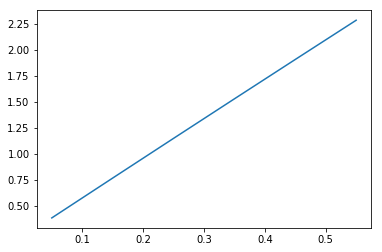

In [3]:
a = 3.14
p = [0.5, 1, 2, 4, 6]
N = 10000
x = 0
t = 1
y1 = 0
y2 = 6.5
y3 = 3.12
data_x = []
data_y = []
h = p[0] / 10 
    
while abs(y3 - a) >= 0.1:
    
    x = 0 
    while  (x < 0.5):  
        y1, y2 = Runge_Kutta(x, y1, y2)
        x = x + h 
   
    y3 = y1
    y4 = y2
    
    x = 0
    while  (x < 0.5):
        y1, y2 = Runge_Kutta(x, 0, y2 + t)
        x = x + h  
     
    y5 = y1
    y6 = y2
    
    y2 = y2 - (((y3) - a) * t )/ (y5  - y3)  
    
x = 0

while  (x < 0.5):  
    y1, y2 = Runge_Kutta(x, y1, y2)
    x = x + h 
    
    data_x.append(x)
    data_y.append(y1)
    x = x + h      

plt.plot(data_x, data_y)
plt.show()
    


     

            
        
    

Судя по экспетиментам Метод Ньютона здесь сходится ДОСТАТОЧНО ПЛОХО. Только при очень хорошем начальном приближении все работает.